<a href="https://colab.research.google.com/github/raina140291/disney/blob/master/SurveyDataExploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!git clone https://github.com/raina140291/disney.git

Cloning into 'disney'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 18 (delta 5), reused 2 (delta 0), pack-reused 0
Unpacking objects: 100% (18/18), done.


In [2]:
#!ls disney/

README.md  SurveyDataExploration.ipynb	ThemePark.csv


In [ ]:
#!pip install plotly --upgrade

In [22]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import matplotlib.pyplot as plotter
#import seaborn as sns
#color = sns.color_palette()
%matplotlib inline

In [23]:
#Read CSV into dataframe
df = pd.read_csv('disney/ThemePark.csv', index_col = 0, sep=",")

In [ ]:
df.dtypes

In [5]:
df.columns

Index(['Visit_Year', 'Num_Adults', 'Num_Kids', 'Ticket_Source', 'Ticket_Type',
       'Stay_Length', 'Transport', 'Digital_Assets', 'Revisit_Concern',
       'Top_Two', 'Giftshop_Concern', 'F&B_Concern', 'Hotel_Concern',
       'Themed_Concern', 'OSS_ROE', 'Cast_Concern', 'Singlepath_Concern',
       'Rides_Concern', 'Tempcheck_Concern', 'Digitalline_Concern', 'EE_ROE',
       'Potluck_ROE', 'Parade_ROE', 'Newhotel_ROE', 'Gender', 'Age',
       'Country'],
      dtype='object')

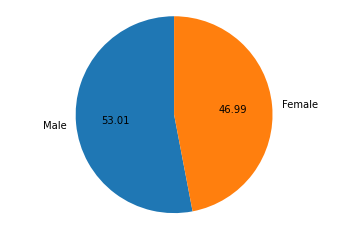

In [34]:
#Desriptive Analytics - GENDER
temp_series = df['Gender'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))

figureObject, axesObject = plotter.subplots()
axesObject.pie(sizes,
        labels=labels,
        autopct='%1.2f',
        startangle=90)
axesObject.axis('equal')
plotter.show()

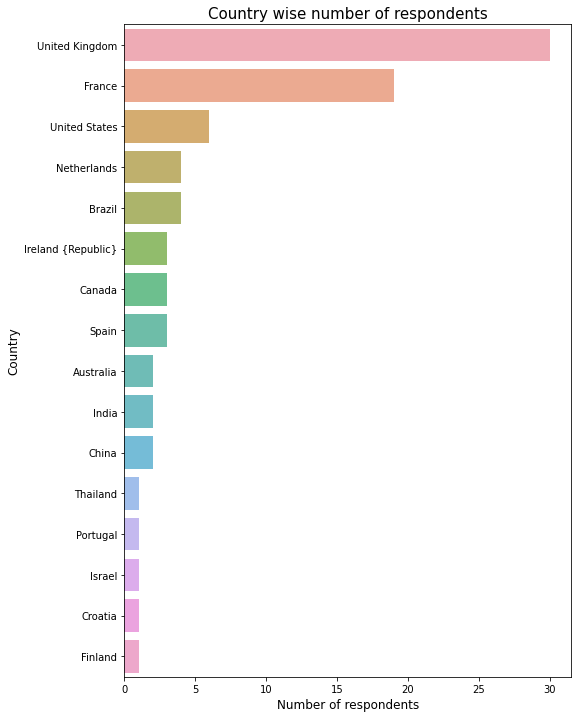

In [31]:
#Desriptive Analytics - COUNTRY
cnt_srs = df['Country'].value_counts().head(25)
plt.figure(figsize=(8,12))
sns.barplot(y=cnt_srs.index, x=cnt_srs.values, alpha=0.8)
plt.xlabel('Number of respondents', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title("Country wise number of respondents", fontsize=15)
plt.show()

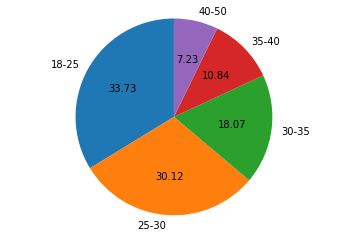

In [36]:
#Desriptive Analytics - AGE
cnt_srs = df['Age'].value_counts()
labels = (np.array(cnt_srs.index))
sizes = (np.array((cnt_srs / cnt_srs.sum())*100))

figureObject, axesObject = plotter.subplots()
axesObject.pie(sizes,
        labels=labels,
        autopct='%1.2f',
        startangle=90)
axesObject.axis('equal')
plotter.show()

In [ ]:
kmeans = KMeans(n_clusters=2, n_init=3, max_iter=3000, random_state=1)
(X_train, X_test) = train_test_split(X,test_size=0.30)
kmeans = kmeans.fit(X_train[['value_1','value_2']])
X_train.loc[:,'labels'] = kmeans.labels_